### Importing Libraries

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [57]:
dataset = pd.read_csv("insurance.csv")
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [58]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [59]:
X

array([[19, 'female', 27.9, 0, 'yes', 'southwest'],
       [18, 'male', 33.77, 1, 'no', 'southeast'],
       [28, 'male', 33.0, 3, 'no', 'southeast'],
       ...,
       [18, 'female', 36.85, 0, 'no', 'southeast'],
       [21, 'female', 25.8, 0, 'no', 'southwest'],
       [61, 'female', 29.07, 0, 'yes', 'northwest']], dtype=object)

In [60]:
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

### Encoding Categorical Data

In [61]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 4, 5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [62]:
X

array([[1.0, 0.0, 0.0, ..., 19, 27.9, 0],
       [0.0, 1.0, 1.0, ..., 18, 33.77, 1],
       [0.0, 1.0, 1.0, ..., 28, 33.0, 3],
       ...,
       [1.0, 0.0, 1.0, ..., 18, 36.85, 0],
       [1.0, 0.0, 1.0, ..., 21, 25.8, 0],
       [1.0, 0.0, 0.0, ..., 61, 29.07, 0]], dtype=object)

### Splitting to Training and Test set

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [64]:
X_train

array([[0.0, 1.0, 0.0, ..., 24, 31.065, 0],
       [1.0, 0.0, 1.0, ..., 27, 25.175, 0],
       [0.0, 1.0, 1.0, ..., 21, 26.03, 0],
       ...,
       [1.0, 0.0, 1.0, ..., 52, 31.73, 2],
       [0.0, 1.0, 1.0, ..., 39, 21.85, 1],
       [0.0, 1.0, 1.0, ..., 58, 49.06, 0]], dtype=object)

In [65]:
y_train

array([34254.05335,  3558.62025,  2102.2647 , ..., 11187.6567 ,
        6117.4945 , 11381.3254 ])

In [66]:
X_test

array([[1.0, 0.0, 1.0, ..., 19, 29.8, 0],
       [0.0, 1.0, 1.0, ..., 61, 38.38, 0],
       [0.0, 1.0, 1.0, ..., 56, 25.935, 0],
       ...,
       [0.0, 1.0, 1.0, ..., 51, 30.03, 1],
       [1.0, 0.0, 1.0, ..., 64, 32.965, 0],
       [0.0, 1.0, 1.0, ..., 21, 31.255, 0]], dtype=object)

In [67]:
y_test

array([ 1744.465  , 12950.0712 , 11165.41765,  8965.79575,  6406.4107 ,
        5266.3656 ,  4747.0529 , 12643.3778 , 13974.45555,  1515.3449 ,
       10796.35025,  7804.1605 , 23401.30575, 40941.2854 ,  5400.9805 ,
        9144.565  ,  8964.06055, 10381.4787 ,  4931.647  , 12648.7034 ,
        4779.6023 , 10601.412  ,  2789.0574 ,  2322.6218 , 48673.5588 ,
        3645.0894 , 12829.4551 ,  1137.4697 , 11763.0009 ,  7935.29115,
        7371.772  ,  4349.462  ,  7731.4271 ,  7050.642  ,  2842.76075,
       21797.0004 , 11566.30055, 20878.78443, 11658.37915, 13224.693  ,
        4454.40265, 20462.99766,  2775.19215, 11842.62375,  4399.731  ,
       36397.576  ,  6059.173  , 23065.4207 , 21344.8467 ,  6282.235  ,
        7729.64575,  6496.886  ,  3208.787  ,  8604.48365, 37484.4493 ,
       13063.883  ,  5267.81815, 19442.3535 ,  1875.344  , 11455.28   ,
       27218.43725,  2801.2588 ,  4753.6368 ,  8547.6913 , 37079.372  ,
       14001.2867 , 10156.7832 , 14901.5167 , 11090.7178 ,  7345

### Model Building

In [68]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Predictions

In [69]:
y_pred = regressor.predict(X_test)
y_pred

array([ 1862.68022128, 16535.55621284, 10872.30263763,  8437.05599202,
        8254.75520035,  5574.40236256,  5703.45483347, 14890.47035976,
       14749.620969  ,  -175.27937965, 11708.78321554, 13213.25038986,
       32969.14731496, 34613.63189057, 10826.87941193, 12918.3465516 ,
       11259.67451741, 14082.72813658,  3883.72193829, 15962.21230409,
        5700.35702886, 15043.65218299,  2879.53757452,  5600.24322337,
       40325.37467684,  3733.36805572, 22225.36270981,  3097.08258516,
       13644.76416748, 12704.6919288 , 11467.58194264,  6608.17037842,
        9762.95278481,  8263.71414806,  1772.43300998, 15048.21425841,
       16593.30309368, 11445.88746987, 12200.69620635, 12977.59659162,
        5463.53838888, 15673.9896062 ,  -744.33352319, 13375.40791051,
        6201.56663645, 28318.19244091,  7291.93320203, 32379.65575041,
        2502.26236249,  7630.11597148,  8248.43233771,  7146.56703015,
         729.75852575,  8292.95690143, 29803.29643976, 18274.83994355,
      

In [70]:
np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test),1)), axis=1)

array([[ 1862.68022128,  1744.465     ],
       [16535.55621284, 12950.0712    ],
       [10872.30263763, 11165.41765   ],
       [ 8437.05599202,  8965.79575   ],
       [ 8254.75520035,  6406.4107    ],
       [ 5574.40236256,  5266.3656    ],
       [ 5703.45483347,  4747.0529    ],
       [14890.47035976, 12643.3778    ],
       [14749.620969  , 13974.45555   ],
       [ -175.27937965,  1515.3449    ],
       [11708.78321554, 10796.35025   ],
       [13213.25038986,  7804.1605    ],
       [32969.14731496, 23401.30575   ],
       [34613.63189057, 40941.2854    ],
       [10826.87941193,  5400.9805    ],
       [12918.3465516 ,  9144.565     ],
       [11259.67451741,  8964.06055   ],
       [14082.72813658, 10381.4787    ],
       [ 3883.72193829,  4931.647     ],
       [15962.21230409, 12648.7034    ],
       [ 5700.35702886,  4779.6023    ],
       [15043.65218299, 10601.412     ],
       [ 2879.53757452,  2789.0574    ],
       [ 5600.24322337,  2322.6218    ],
       [40325.37

In [72]:
from sklearn.metrics import r2_score
print(f"The R2 score of the model is {r2_score(y_test, y_pred)}")

The R2 score of the model is 0.7451132516053688


### Visualisations

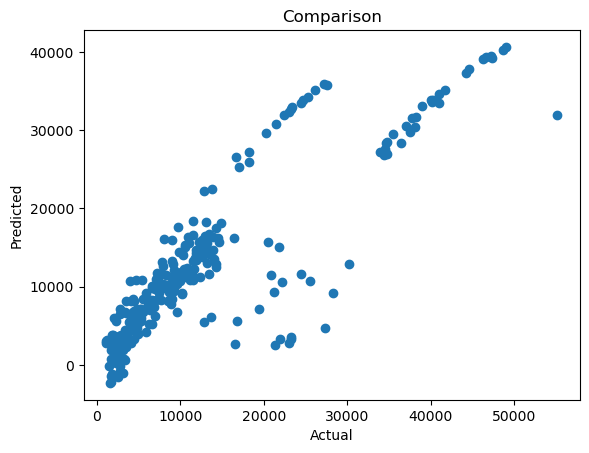

In [73]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Comparison')
plt.show()

<AxesSubplot:>

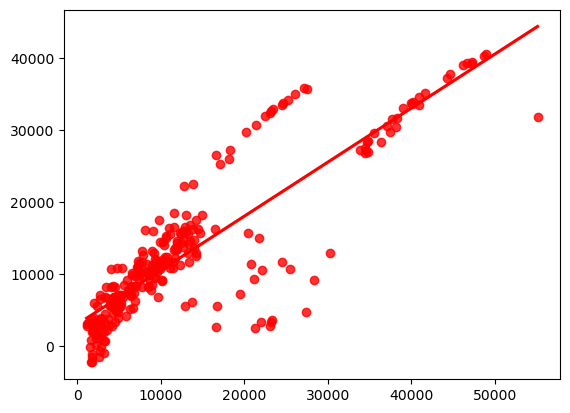

In [74]:
sns.regplot(x = y_test, y = y_pred, ci= None, color='red')

In [80]:
pred_df = pd.DataFrame({'Actual Values':y_test, 'Predicted Values':y_pred, 'Difference':y_test-y_pred})
pred_df

,Actual Values,Predicted Values,Difference
0,1744.46500,1862.680221,-118.215221
1,12950.07120,16535.556213,-3585.485013
2,11165.41765,10872.302638,293.115012
3,8965.79575,8437.055992,528.739758
4,6406.41070,8254.755200,-1848.344500
...,...,...,...
263,2690.11380,2919.531111,-229.417311
264,9058.73030,15956.662214,-6897.931914
265,9377.90470,10869.626063,-1491.721363
266,14692.66935,15665.125571,-972.456221
